In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().resolve().parent))

In [3]:
from experiments.run_experiment import TrainingConfig, run_training, EvaluateConfig, run_evaluation, generate_training_plots
from environments.fronzenlake import FrozenLakeConfig, get_frozenlake_env
from agents.sarsa_td0 import SarsaTD0Agent, SarsaTD0Config
from agents.sarsa_expected import SarsaExpectedConfig, SarsaExpectedAgent
from metrics.learning_mertrics import total_reward_per_episode
from metrics.frustration_metrics import total_td_error_per_episode, frustration_rate_per_episode, tail_frustration_per_episode, cvar_tail_frustration_per_episode

In [6]:
sarsa_td0_config = SarsaTD0Config(
    alpha=0.1,
    gamma=0.99,
    epsilon=0.3,
    reward_metrics={
        "total_reward_per_episode": total_reward_per_episode,
    },
    td_error_metrics={
        "total_td_error_per_episode": total_td_error_per_episode,
        "frustration_rate_per_episode": frustration_rate_per_episode,
        "tail_frustration_per_episode_90": lambda td: tail_frustration_per_episode(
            td, percentile=0.9
        ),
        "cvar_tail_frustration_per_episode_90": lambda td: cvar_tail_frustration_per_episode(
            td, percentile=0.9
        ),
    },
)

env_config = FrozenLakeConfig(map_name="4x4", is_slippery=False)

training_config = TrainingConfig(
    name="sarsa_frozenlake",
    num_train_episodes=100000,
    seed=1,
    env_kwargs={"config": env_config},
    agent_kwargs={"config": sarsa_td0_config},
)

eval_config = EvaluateConfig(
    name="sarsa_frozenlake",
    num_eval_episodes=1000,
    seed=1,
    env_kwargs={"config": env_config},
)

agent, training_metrics = run_training(
    config=training_config,
    env_factory=get_frozenlake_env,
    agent_factory=SarsaTD0Agent,
)

evaluation_metrics = run_evaluation(
    config = eval_config,
    env_factory=get_frozenlake_env,
    agent=agent
)

agent.config

SarsaTD0Config(alpha=0.1, gamma=0.99, epsilon=0.3, epsilon_min=0.01, epsilon_decay=0.995, seed=None, reward_metrics={'total_reward_per_episode': <function total_reward_per_episode at 0x1121ed9e0>}, td_error_metrics={'total_td_error_per_episode': <function total_td_error_per_episode at 0x118940ae0>, 'frustration_rate_per_episode': <function frustration_rate_per_episode at 0x1189409a0>, 'tail_frustration_per_episode_90': <function <lambda> at 0x118df5d00>, 'cvar_tail_frustration_per_episode_90': <function <lambda> at 0x118df5b20>})

In [17]:
agent.config

SarsaTD0Config(alpha=0.1, gamma=0.99, epsilon=0.3, epsilon_min=0.01, epsilon_decay=0.995, seed=None, reward_metrics={'total_reward_per_episode': <function total_reward_per_episode at 0x11243b060>}, td_error_metrics={'total_td_error_per_episode': <function total_td_error_per_episode at 0x11243aa20>, 'frustration_rate_per_episode': <function frustration_rate_per_episode at 0x11243b100>, 'tail_frustration_per_episode_90': <function <lambda> at 0x112c03060>, 'cvar_tail_frustration_per_episode_90': <function <lambda> at 0x112c02f20>})

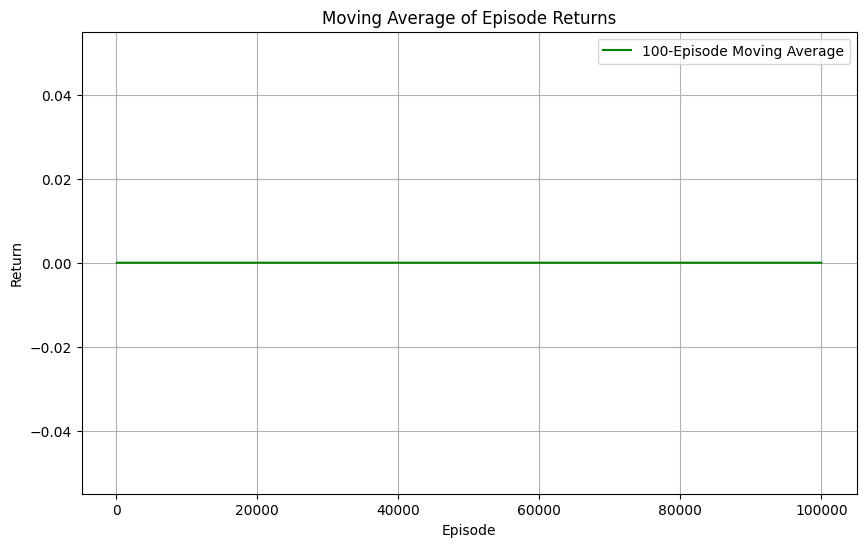

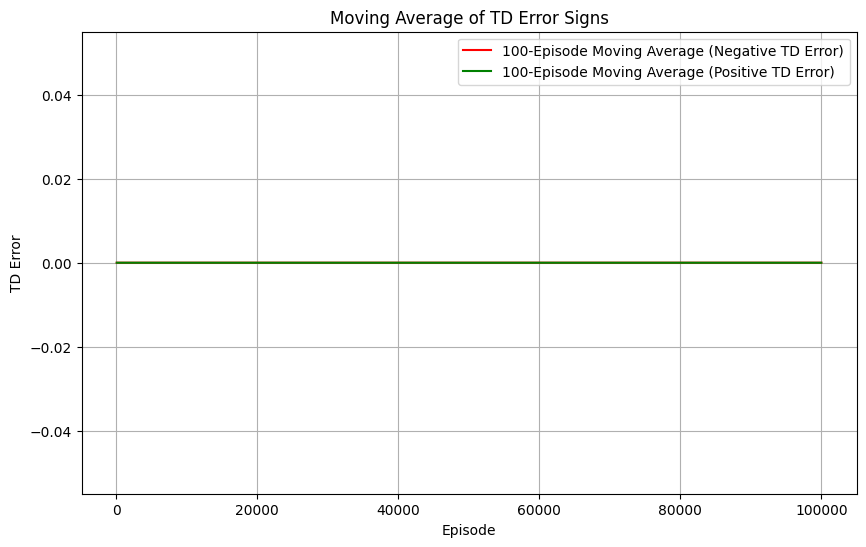

In [ ]:
generate_training_plots(training_metrics)

In [5]:
# experiment for cliffwalking
t = build_summary_json(training_config=training_config, eval_config=eval_config, training_metrics=training_metrics, evaluation_metrics=evaluation_metrics)

In [9]:
t.keys()

dict_keys(['run_id', 'per_run_result', 'summary'])

In [11]:
t["summary"].keys()

dict_keys(['train_episodes', 'eval_episodes', 'avg_return', 'final_return', 'avg_td_error', 'final_td_error', 'evaluation_metrics'])

In [10]:
t["per_run_result"].keys()

dict_keys(['timestamp', 'training_config', 'eval_config', 'training_metrics', 'evaluation_metrics'])

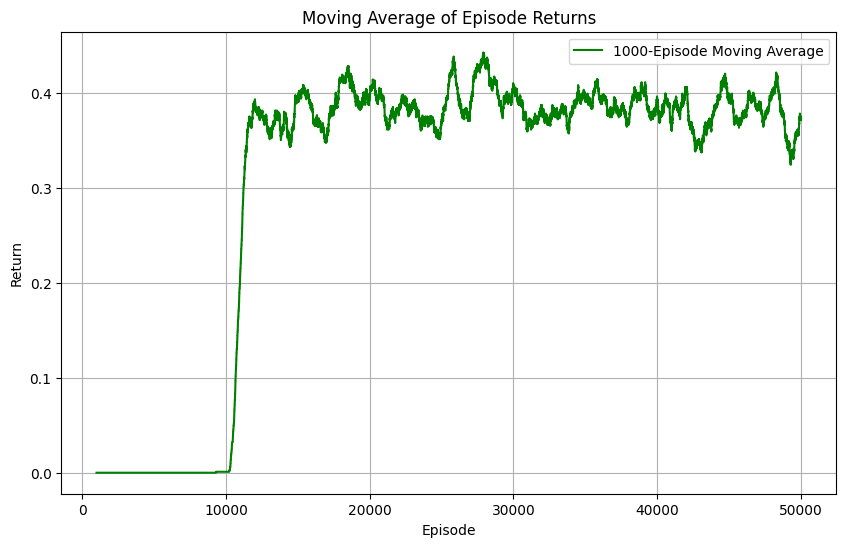

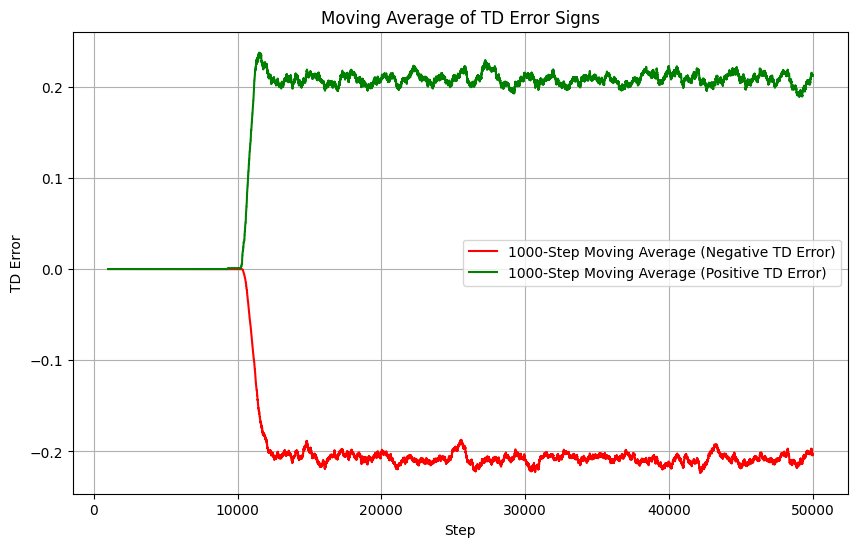

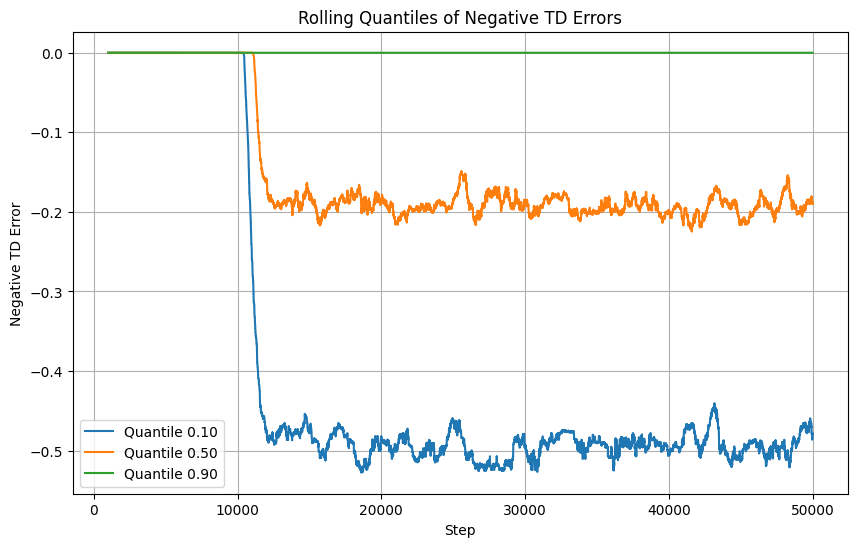

PosixPath('runs/20251226_111604')

In [14]:
config = ExperimentConfig(
    name="sarsa_frozenlake",
    num_train_episodes=50000,
    num_eval_episodes=1000,
    seed=0,
    env_kwargs={"config": FrozenLakeConfig(map_name="4x4", is_slippery=True)},
    agent_kwargs={
        "config": SarsaExpectedConfig(alpha=0.1, gamma=0.99, epsilon=0.1, seed=0)
    },
)

per_episode_metrics, result = run_experiment(
    config, env_factory=get_frozenlake_env, agent_factory=SarsaExpectedAgent
)

save_run(
    result=result,
    per_episode_metrics=per_episode_metrics,
    save_plots=True,
    window_size=1000,
)